# 6.5 Preprocess department 35-00016 (Orlando, FL)

This is a small table with few entries. A good statistical knowledge must be required to generate good models (and they should be simple). Anyway, let's preprocess.

In [28]:
import matplotlib.pyplot
import pandas

from cpe_help import Department

In [8]:
dept = Department('35-00016')
path = dept.tabular_input_dir / '35-00016_UOF-OIS-P.csv'
df = pandas.read_csv(path, low_memory=False, skiprows=[1])
df.head().T

,0,1,2,3,4
INCIDENT_UNIQUE_IDENTIFIER,16-179658,16-242039,16-153523,16-025283,16-041504
INCIDENT_DATE,5/1/16,6/12/16,4/13/16,1/18/16,1/29/16
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,707 S Orange Blossom Tr,1912 S. Orange Ave,Bowen DR at Folkstone,6584 Swissco Dr #734,South St & Bumby Ave
Unnamed: 3,Armed Subject,Active Shooter,Battery,Well Being Check,Carjacking
NUMBER_OF_OFFICERS,2,11,1,2,3
OFFICER_RACE,"W, W","W,W, W, W, W, B, W, W, B, W, W",W,"W, B","W, W, W"
OFFICER_ETHNICITY,"N, N","N,N, N, N, N, H, N, N, N, N, H",H,"H, N","N, N, N"
OFFICER_GENDER,"M, M","M, M, M, M, M, M, M, M, M, M, M",M,"M, F","M, M, M"
OFFICER_AGE,"28, 28","29, 39, 48, 46, 34, 45, 47, 44, 47, 38, 31",34,"41, 37","31, 47, 32"
OFFICER_YEARS_ON_FORCE,"3, 1","4, 14, 25, 23, 11, 23, 18, 21, 21, 14, 2",8,"4, 5","7, 18, 9"


As we have both the address and coordinates, this dataset *may be used for benchmarking geocoding* services/methods.

# Date

There is a single date column with no type, probably easy.

In [10]:
date = df['INCIDENT_DATE']
fdate = pandas.to_datetime(date, format='%m/%d/%y')

In [11]:
fdate.describe()

count                      54
unique                     52
top       2012-02-19 00:00:00
freq                        2
first     2009-05-06 00:00:00
last      2018-05-07 00:00:00
Name: INCIDENT_DATE, dtype: object

2009 to 2018, looks good.

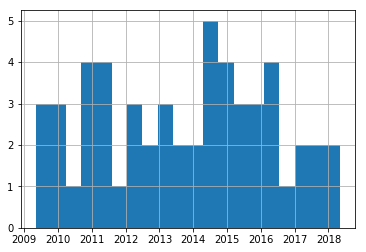

In [18]:
fdate.hist(bins=20)

A relatively small amount through the years... Consistent

# Location

There are the geographic coordinates, which we will use, bu also, there's an address of the location. This may be used as a testing ground for geocoding methods.

Also, there are lots of unknown lat/longitudes and these can be filled in with geocoding itself. This is a *great* playground. :D

In [23]:
lat = df['LOCATION_LATITUDE']
lon = df['LOCATION_LONGITUDE']
address = df['LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION']

In [21]:
lat.isnull().mean()

0.25925925925925924

In [22]:
lon.isnull().mean()

0.25925925925925924

In [26]:
(lat.isnull() == lon.isnull()).all()

True

In [24]:
address.isnull().mean()

0.0

In [25]:
address.value_counts().head()

390 N Orange          1
1159 Soria Ct         1
1905 Lee Road         1
756 Bennett Rd.       1
Universal/Vineland    1
Name: LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION, dtype: int64

In [31]:
precincts = dept.load_police_precincts()

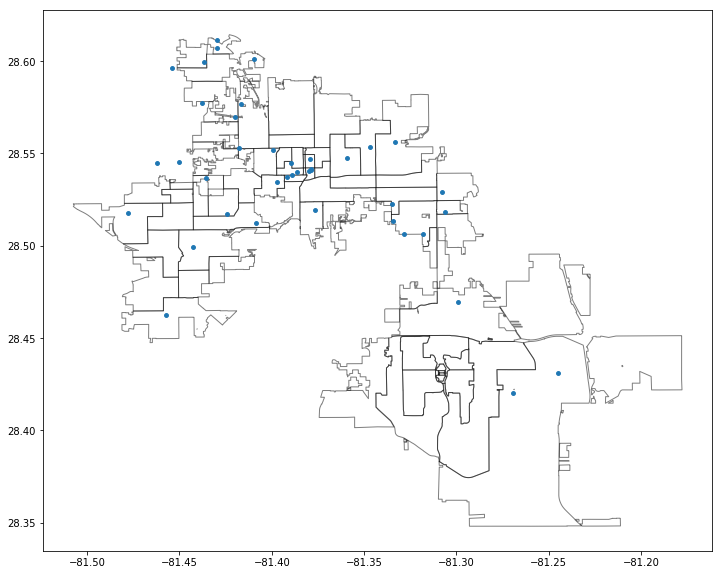

In [37]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

ax.set_aspect('equal')
precincts.plot(ax=ax, facecolor='none', edgecolor=(0, 0, 0, 0.5))
ax.scatter(lon, lat, s=15)

Some points are outside of boundaries, but the map indicates a very healthy dataset. There's a central region where OIS happen more.

*wip*

Later on I will use this data as a testing ground for geocoding (the only spatial information available in 36% of the data is the street address).